In [1]:
import yt

In [2]:
import numpy as np

In [38]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: MacOSX


In [61]:
import yt.units as u

In [63]:
u.mp*2e20

0.000334747044761 g

In [65]:
u.mp*2e17

3.34747044761e-07 g

In [3]:
ds = yt.load("/Users/astrocomnyc/Desktop/FIRE_M12i_ref11/snapshot_600.hdf5")


yt : [INFO     ] 2017-06-13 10:59:24,135 Calculating time from 1.000e+00 to be 4.355e+17 seconds
yt : [INFO     ] 2017-06-13 10:59:24,137 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2017-06-13 10:59:24,182 Parameters: current_time              = 4.35455710881e+17 s
yt : [INFO     ] 2017-06-13 10:59:24,185 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2017-06-13 10:59:24,188 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-06-13 10:59:24,192 Parameters: domain_right_edge         = [ 60000.  60000.  60000.]
yt : [INFO     ] 2017-06-13 10:59:24,197 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-06-13 10:59:24,199 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2017-06-13 10:59:24,201 Parameters: omega_lambda              = 0.728
yt : [INFO     ] 2017-06-13 10:59:24,204 Parameters: omega_matter              = 0.272
yt : [INFO     ] 2017-06-13 10:59:24,206 Parameters: hubble_constant           = 0

In [4]:
da = ds.sphere("max",(50,'kpc'))

yt : [INFO     ] 2017-06-13 10:59:28,149 Allocating for 4.787e+06 particles (index particle type 'all')
yt : [INFO     ] 2017-06-13 10:59:29,037 Identified 3.468e+05 octs
yt : [INFO     ] 2017-06-13 11:00:09,263 Max Value is 4.06917e-22 at 29286.1032485961914062 31049.2944717407226562 32589.5833969116210938


In [5]:
da

YTSphere (snapshot_600): , center=[  1.28728593e+26   1.36478792e+26   1.43249212e+26] cm, radius=1.54283879048e+23 cm

In [7]:
plot = yt.ProjectionPlot(ds,"y", "density",data_source=da, center=([  1.28728593e+26,   1.36478792e+26,   1.43249212e+26], "cm"), width=(50,"kpc"))

yt : [INFO     ] 2017-06-13 11:01:19,718 Projection completed
yt : [INFO     ] 2017-06-13 11:01:19,737 xlim = 143172070060475930051084288.000000 143326353939524060572549120.000000
yt : [INFO     ] 2017-06-13 11:01:19,738 ylim = 128651451060475933302456320.000000 128805734939524063823921152.000000
yt : [INFO     ] 2017-06-13 11:01:19,743 xlim = 32572.033385 32607.133385
yt : [INFO     ] 2017-06-13 11:01:19,746 ylim = 29268.553267 29303.653267
yt : [INFO     ] 2017-06-13 11:01:19,759 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


In [8]:
proj = yt.ProjectionPlot(ds, 'z', "density", weight_field="density")

yt : [INFO     ] 2017-06-13 11:02:27,495 Projection completed
yt : [INFO     ] 2017-06-13 11:02:27,496 xlim = 0.000000 60000.000000
yt : [INFO     ] 2017-06-13 11:02:27,497 ylim = 0.000000 60000.000000
yt : [INFO     ] 2017-06-13 11:02:27,499 xlim = 0.000000 60000.000000
yt : [INFO     ] 2017-06-13 11:02:27,500 ylim = 0.000000 60000.000000
yt : [INFO     ] 2017-06-13 11:02:27,503 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


In [43]:
proj_frb = proj.data_source.to_frb((1.0, "Mpc"), 512)

In [44]:
proj_dens = np.array(proj_frb['density'])

yt : [INFO     ] 2017-06-13 11:48:57,474 Making a fixed resolution buffer of (density) 512 by 512


In [45]:
proj_frb['density'].in_units("g/kpc**3")

ImageArray([[  3.38299242e+34,   3.38299242e+34,   3.38299242e+34, ...,
          1.72795815e+32,   1.72795815e+32,   1.72795815e+32],
       [  3.38299242e+34,   3.38299242e+34,   3.38299242e+34, ...,
          1.72795815e+32,   1.72795815e+32,   1.72795815e+32],
       [  3.38299242e+34,   3.38299242e+34,   3.38299242e+34, ...,
          1.72795815e+32,   1.72795815e+32,   1.72795815e+32],
       ..., 
       [  2.55031564e+34,   2.55031564e+34,   2.55031564e+34, ...,
          3.58786237e+33,   3.58786237e+33,   3.58786237e+33],
       [  2.55031564e+34,   2.55031564e+34,   2.55031564e+34, ...,
          3.58786237e+33,   3.58786237e+33,   3.58786237e+33],
       [  2.55031564e+34,   2.55031564e+34,   2.55031564e+34, ...,
          3.58786237e+33,   3.58786237e+33,   3.58786237e+33]]) g/kpc**3

In [46]:
plt.imshow(proj_dens)

In [11]:
v, c = ds.find_max("density")

yt : [INFO     ] 2017-06-13 11:05:20,914 Max Value is 4.06917e-22 at 29286.1032485961914062 31049.2944717407226562 32589.5833969116210938


In [35]:
proj = yt.ProjectionPlot(ds, 'z', "density", weight_field="density")

yt : [INFO     ] 2017-06-13 11:44:16,460 Projection completed
yt : [INFO     ] 2017-06-13 11:44:16,461 xlim = 0.000000 60000.000000
yt : [INFO     ] 2017-06-13 11:44:16,462 ylim = 0.000000 60000.000000
yt : [INFO     ] 2017-06-13 11:44:16,464 xlim = 0.000000 60000.000000
yt : [INFO     ] 2017-06-13 11:44:16,465 ylim = 0.000000 60000.000000
yt : [INFO     ] 2017-06-13 11:44:16,469 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



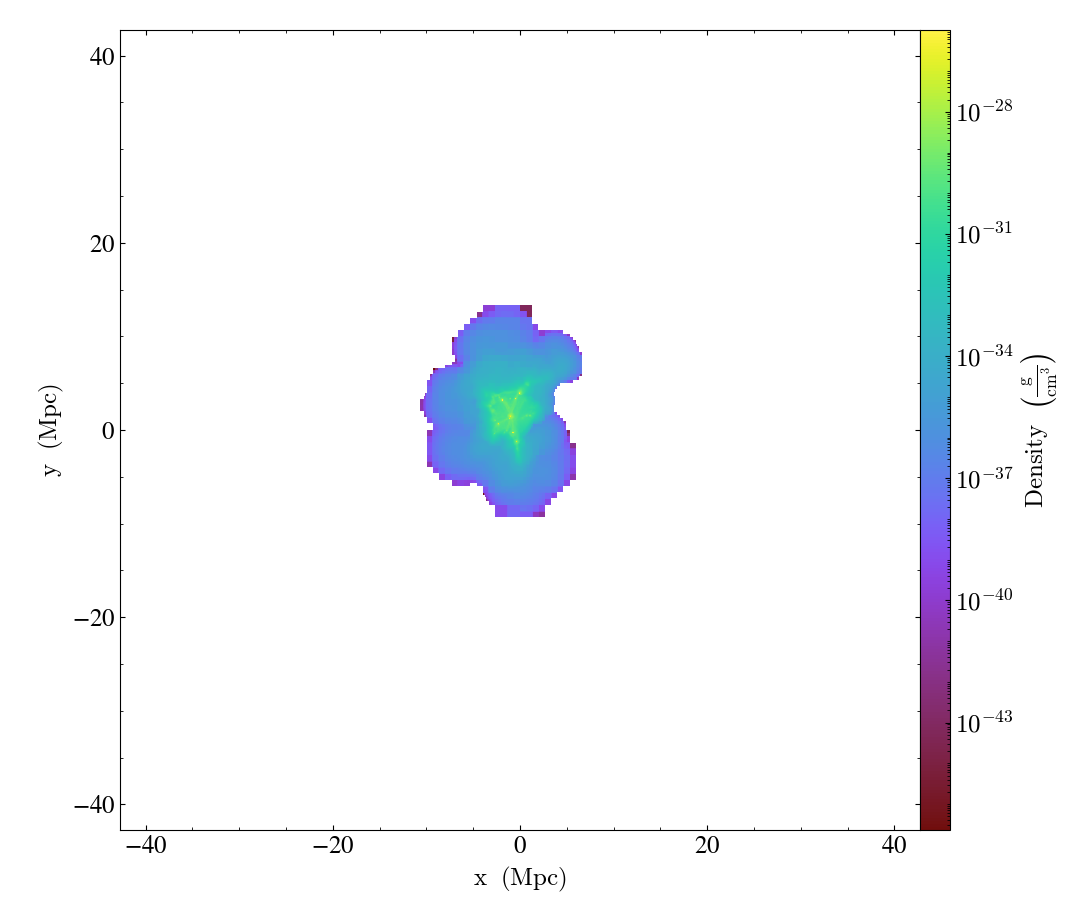

In [36]:
proj.show()

In [18]:
proj_dens

array([[  1.15146141e-30,   1.15146141e-30,   1.15146141e-30, ...,
          5.88141176e-33,   5.88141176e-33,   5.88141176e-33],
       [  1.15146141e-30,   1.15146141e-30,   1.15146141e-30, ...,
          5.88141176e-33,   5.88141176e-33,   5.88141176e-33],
       [  1.15146141e-30,   1.15146141e-30,   1.15146141e-30, ...,
          5.88141176e-33,   5.88141176e-33,   5.88141176e-33],
       ..., 
       [  8.68045116e-31,   8.68045116e-31,   8.68045116e-31, ...,
          1.22119253e-31,   1.22119253e-31,   1.22119253e-31],
       [  8.68045116e-31,   8.68045116e-31,   8.68045116e-31, ...,
          1.22119253e-31,   1.22119253e-31,   1.22119253e-31],
       [  8.68045116e-31,   8.68045116e-31,   8.68045116e-31, ...,
          1.22119253e-31,   1.22119253e-31,   1.22119253e-31]])

In [20]:
proj_dens>1.0e-30

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [22]:
np.sum(proj_dens>1.0e-30)

9560

In [25]:
proj_frb["density"]>1.0e-30

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [48]:
help(proj_frb)

Help on FixedResolutionBuffer in module yt.visualization.fixed_resolution object:

class FixedResolutionBuffer(__builtin__.object)
 |  FixedResolutionBuffer(data_source, bounds, buff_size, antialias = True)
 |  
 |  This accepts a 2D data object, such as a Projection or Slice, and
 |  implements a protocol for generating a pixelized, fixed-resolution
 |  image buffer.
 |  
 |  yt stores 2D AMR data internally as a set of 2D coordinates and the
 |  half-width of individual pixels.  Converting this to an image buffer
 |  requires a deposition step, where individual variable-resolution pixels
 |  are deposited into a buffer of some resolution, to create an image.
 |  This object is an interface to that pixelization step: it can deposit
 |  multiple fields.  It acts as a standard YTDataContainer object, such that
 |  dict-style access returns an image of a given field.
 |  
 |  Parameters
 |  ----------
 |  data_source : :class:`yt.data_objects.construction_data_containers.YTQuadTreeProj` 

In [52]:
proj_frb["density"]

ImageArray([[  1.15146141e-30,   1.15146141e-30,   1.15146141e-30, ...,
          5.88141176e-33,   5.88141176e-33,   5.88141176e-33],
       [  1.15146141e-30,   1.15146141e-30,   1.15146141e-30, ...,
          5.88141176e-33,   5.88141176e-33,   5.88141176e-33],
       [  1.15146141e-30,   1.15146141e-30,   1.15146141e-30, ...,
          5.88141176e-33,   5.88141176e-33,   5.88141176e-33],
       ..., 
       [  8.68045116e-31,   8.68045116e-31,   8.68045116e-31, ...,
          1.22119253e-31,   1.22119253e-31,   1.22119253e-31],
       [  8.68045116e-31,   8.68045116e-31,   8.68045116e-31, ...,
          1.22119253e-31,   1.22119253e-31,   1.22119253e-31],
       [  8.68045116e-31,   8.68045116e-31,   8.68045116e-31, ...,
          1.22119253e-31,   1.22119253e-31,   1.22119253e-31]]) g/cm**3

In [64]:
proj_dens>0.000334747044761*u.g 

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)